<a href="https://colab.research.google.com/github/qyoshii/2AP_07_elastic-wave/blob/main/07_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 読み込み

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from matplotlib.ticker import ScalarFormatter
import math
import matplotlib.cm as cm
import pandas as pd
from pandas import Series, DataFrame

from google.colab import files

In [12]:
from matplotlib.colors import ListedColormap
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
#plt.rcParams["font.family"] = "arial"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ
plt.rcParams["mathtext.cal"] = "serif"      # TeX表記に関するフォント設定
plt.rcParams["mathtext.rm"] = "serif"       # TeX表記に関するフォント設定
plt.rcParams["mathtext.it"] = "serif:italic"# TeX表記に関するフォント設定
plt.rcParams["mathtext.bf"] = "serif:bold"  # TeX表記に関するフォント設定
plt.rcParams["mathtext.fontset"] = "cm"     # TeX表記に関するフォント設定
plt.rcParams['xtick.direction'] = 'in'            #x軸の目盛線
plt.rcParams['ytick.direction'] = 'in'            #y軸の目盛線
plt.rcParams["figure.subplot.left"] = 0.14  # 余白
plt.rcParams["figure.subplot.bottom"] = 0.14# 余白
plt.rcParams["figure.subplot.right"] =0.90  # 余白
plt.rcParams["figure.subplot.top"] = 0.91   # 余白
plt.rcParams['axes.linewidth'] = 1.0        # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams["xtick.top"] = True            # 上部に目盛り線を描くかどうか
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["ytick.right"] = True          # 右部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 8.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 8.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 1.0     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.0     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.size"] = 4.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 4.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 1.0     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 1.0     # y軸副目盛り線の線幅
plt.rcParams["legend.loc"] = "best"         # 凡例の位置、"best"でいい感じのところ
#plt.rcParams["legend.frameon"] = False      # 凡例を囲うかどうか、Trueで囲う、Falseで囲わない
plt.rcParams["legend.frameon"] = True     # 凡例を囲うかどうか、Trueで囲う、Falseで囲わない

from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import numpy as np
from matplotlib.ticker import ScalarFormatter

In [13]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# plotの確認

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

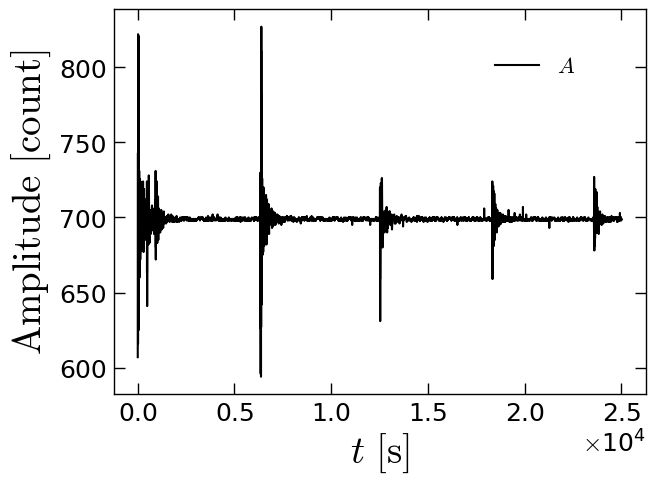

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm  # colormap
from matplotlib.patches import Circle
fig = plt.figure(figsize=(7, 5))

ax = fig.add_subplot(111)
# 横軸を10^にする
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(18)
ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
ax.get_xaxis().set_tick_params(pad=10)

##################################
npArraydata = np.loadtxt("/content/drive/MyDrive/2AP_07/day2/A.TXT", comments='!', unpack=True)
value_0   =  npArraydata[0,]-npArraydata[0,0] ## 最初を引く
value_1   =  npArraydata[1,]
ax.plot(value_0 , value_1,  label="$A$", color = "black")#color = cm.viridis(0./5.))
##################################

#　軸から数字を離す方法
ax.get_xaxis().set_tick_params(pad=5)
ax.get_yaxis().set_tick_params(pad=5)
plt.rcParams["legend.frameon"] = False     # 凡例を囲うかどうか、Trueで囲う、Falseで囲わない

#ax.set_xlim(-15., 15.0)
#ax.set_ylim(0.0, 0.1)
plt.tick_params(labelsize=24)
ax.set_xlabel('$t~\mathrm{[s]}$', fontsize=28)
ax.set_ylabel('$\mathrm{Amplitude}~\mathrm{[count]}$', fontsize=28)
plt.legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)
plt.tick_params(labelsize=18)
fig.savefig('/content/drive/MyDrive/2AP_07/day2/A_check.png', bbox_inches='tight',transparent=True)
files.download("/content/drive/MyDrive/2AP_07/day2/A_check.png")

plt.show()

# 上の波形を拡大

### ここを手で変えることで，拡大できる．
### これを用いて値を読み取る
- xl_range = 6300
- xr_range = 6400
- yl_range  = 690
- yt_range  = 710

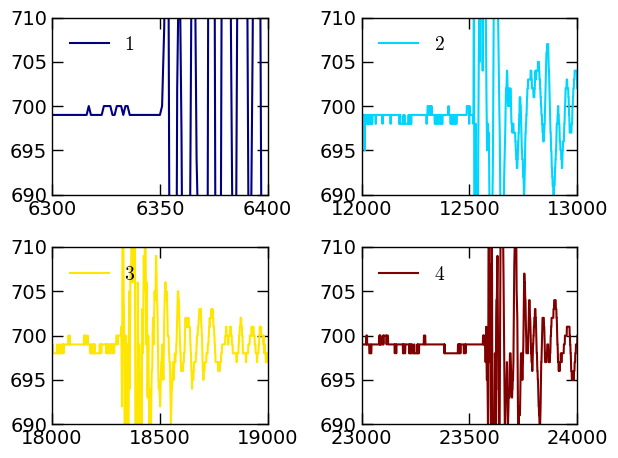

In [17]:
fig = plt.figure()

# add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

##################################
npArraydata = np.loadtxt("/content/drive/MyDrive/2AP_07/day2/A.TXT", comments='!', unpack=True)
value_0   =  npArraydata[0,]-npArraydata[0,0] ## 最初を引く
value_1   =  npArraydata[1,]
##################################

### ここを手で変える．
xl_range =  6300
xr_range = 6400
yl_range  = 690
yt_range  = 710
ax1.set_xlim(xl_range, xr_range)
ax1.set_ylim(yl_range, yt_range)
ax1.plot(value_0 , value_1,  label="$1$", color = cm.jet(0./3.))

### ここを手で変える．
xl_range =  12000
xr_range = 13000
yl_range  = 690
yt_range  = 710
ax2.set_xlim(xl_range, xr_range)
ax2.set_ylim(yl_range, yt_range)
ax2.plot(value_0 , value_1,  label="$2$", color = cm.jet(1./3.))

### ここを手で変える．
xl_range = 18000
xr_range = 19000
yl_range  = 690
yt_range  = 710
ax3.set_xlim(xl_range, xr_range)
ax3.set_ylim(yl_range, yt_range)
ax3.plot(value_0 , value_1,  label="$3$", color = cm.jet(2./3.))

### ここを手で変える．
xl_range =  23000
xr_range = 24000
yl_range  = 690
yt_range  = 710
ax4.set_xlim(xl_range, xr_range)
ax4.set_ylim(yl_range, yt_range)
ax4.plot(value_0 , value_1,  label="$4$", color = cm.jet(3./3.))

ax1.legend(loc = 'upper left') #凡例
ax2.legend(loc = 'upper left') #凡例
ax3.legend(loc = 'upper left') #凡例
ax4.legend(loc = 'upper left') #凡例
fig.tight_layout()              #レイアウトの設定
plt.show()

# 立ち上がりの値を記録

6352


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

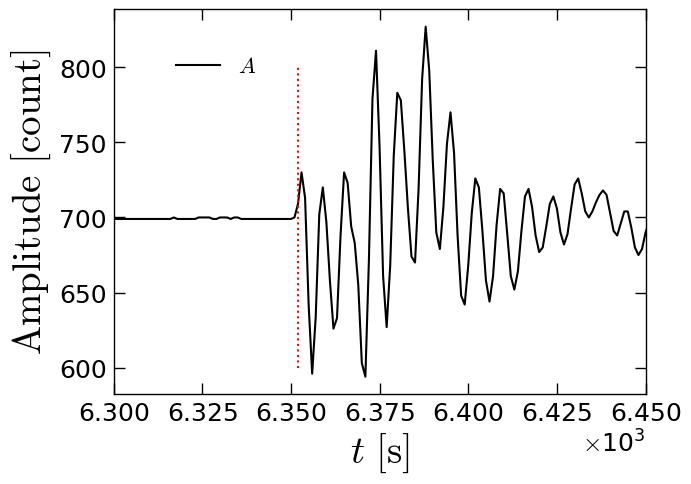

In [20]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(7, 5))
import matplotlib.cm as cm  # colormap
from matplotlib.patches import Circle

ax = fig.add_subplot(111)
# 横軸を10^にする
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(18)
ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
ax.get_xaxis().set_tick_params(pad=10)

##################################
npArraydata = np.loadtxt("/content/drive/MyDrive/2AP_07/day2/A.TXT", comments='!', unpack=True)
value_0   =  npArraydata[0,]-npArraydata[0,0]
value_1   =  npArraydata[1,]
ax.plot(value_0 , value_1,  label="$A$", color = "black")#color = cm.viridis(0./5.))
##################################

up1 =  pd.read_excel(f"/content/drive/MyDrive/2AP_07/day2/A.xlsx", usecols="B", skiprows=0).to_numpy().flatten()
print(up1[0])
plt.vlines(up1[0], 600, 800, color='red', linestyles='dotted')


#　軸から数字を離す方法
ax.get_xaxis().set_tick_params(pad=5)
ax.get_yaxis().set_tick_params(pad=5)
plt.rcParams["legend.frameon"] = False     # 凡例を囲うかどうか、Trueで囲う、Falseで囲わない

### ここを手で変える．
xl_range =  6300
xr_range = 6450
ax.set_xlim(xl_range, xr_range)
### ここを手で変える．

plt.tick_params(labelsize=24)
ax.set_xlabel('$t~\mathrm{[s]}$', fontsize=28)
ax.set_ylabel('$\mathrm{Amplitude}~\mathrm{[count]}$', fontsize=28)
plt.legend(bbox_to_anchor=(0.1, 0.9), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)
plt.tick_params(labelsize=18)
fig.savefig('/content/drive/MyDrive/2AP_07/day2/A1.png', bbox_inches='tight',transparent=True)
files.download("/content/drive/MyDrive/2AP_07/day2/A1.png")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

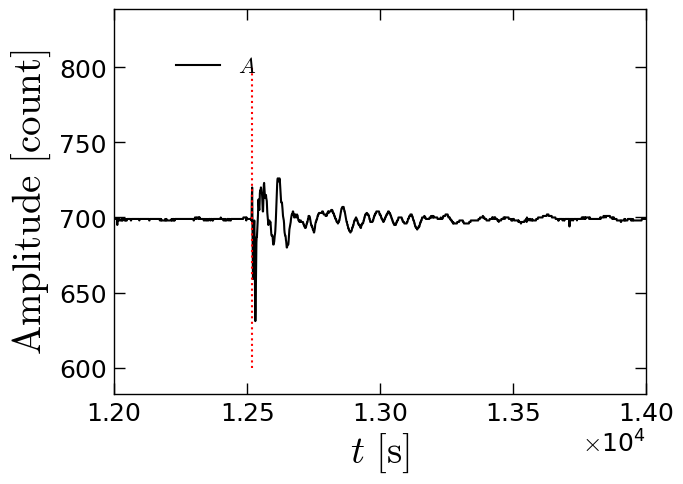

In [21]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(7, 5))
import matplotlib.cm as cm  # colormap
from matplotlib.patches import Circle

ax = fig.add_subplot(111)
# 横軸を10^にする
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(18)
ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
ax.get_xaxis().set_tick_params(pad=10)

##################################
npArraydata = np.loadtxt("/content/drive/MyDrive/2AP_07/day2/A.TXT", comments='!', unpack=True)
value_0   =  npArraydata[0,]-npArraydata[0,0]
value_1   =  npArraydata[1,]
ax.plot(value_0 , value_1,  label="$A$", color = "black")#color = cm.viridis(0./5.))
##################################

up1 =  pd.read_excel(f"/content/drive/MyDrive/2AP_07/day2/A.xlsx", usecols="B", skiprows=0).to_numpy().flatten()
plt.vlines(up1[1], 600, 800, color='red', linestyles='dotted')


#　軸から数字を離す方法
ax.get_xaxis().set_tick_params(pad=5)
ax.get_yaxis().set_tick_params(pad=5)
plt.rcParams["legend.frameon"] = False     # 凡例を囲うかどうか、Trueで囲う、Falseで囲わない

### ここを手で変える．
xl_range =  12000
xr_range = 14000
ax.set_xlim(xl_range, xr_range)
### ここを手で変える．

plt.tick_params(labelsize=24)
ax.set_xlabel('$t~\mathrm{[s]}$', fontsize=28)
ax.set_ylabel('$\mathrm{Amplitude}~\mathrm{[count]}$', fontsize=28)
plt.legend(bbox_to_anchor=(0.1, 0.9), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)
plt.tick_params(labelsize=18)
fig.savefig('/content/drive/MyDrive/2AP_07/day2/A2.png', bbox_inches='tight',transparent=True)
files.download("/content/drive/MyDrive/2AP_07/day2/A2.png")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

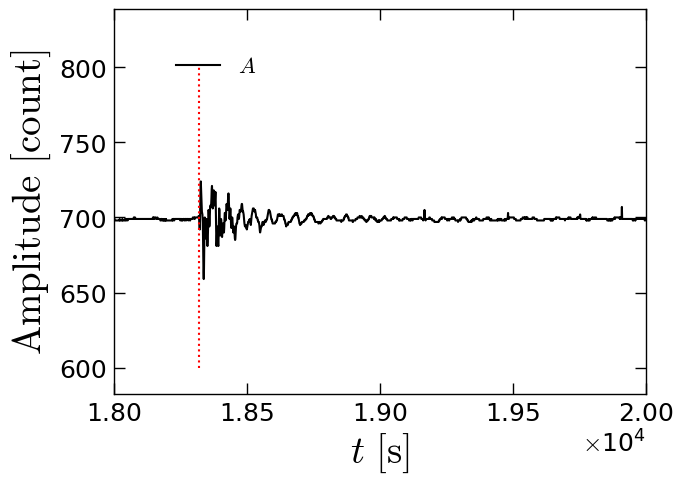

In [23]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(7, 5))
import matplotlib.cm as cm  # colormap
from matplotlib.patches import Circle

ax = fig.add_subplot(111)
# 横軸を10^にする
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(18)
ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
ax.get_xaxis().set_tick_params(pad=10)

##################################
npArraydata = np.loadtxt("/content/drive/MyDrive/2AP_07/day2/A.TXT", comments='!', unpack=True)
value_0   =  npArraydata[0,]-npArraydata[0,0]
value_1   =  npArraydata[1,]
ax.plot(value_0 , value_1,  label="$A$", color = "black")#color = cm.viridis(0./5.))
##################################

up1 =  pd.read_excel(f"/content/drive/MyDrive/2AP_07/day2/A.xlsx", usecols="B", skiprows=0).to_numpy().flatten()
plt.vlines(up1[2], 600, 800, color='red', linestyles='dotted')


#　軸から数字を離す方法
ax.get_xaxis().set_tick_params(pad=5)
ax.get_yaxis().set_tick_params(pad=5)
plt.rcParams["legend.frameon"] = False     # 凡例を囲うかどうか、Trueで囲う、Falseで囲わない

### ここを手で変える．
xl_range = 18000
xr_range = 20000
ax.set_xlim(xl_range, xr_range)
### ここを手で変える．

plt.tick_params(labelsize=24)
ax.set_xlabel('$t~\mathrm{[s]}$', fontsize=28)
ax.set_ylabel('$\mathrm{Amplitude}~\mathrm{[count]}$', fontsize=28)
plt.legend(bbox_to_anchor=(0.1, 0.9), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)
plt.tick_params(labelsize=18)
fig.savefig('/content/drive/MyDrive/2AP_07/day2/A3.png', bbox_inches='tight',transparent=True)
files.download("/content/drive/MyDrive/2AP_07/day2/A3.png")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

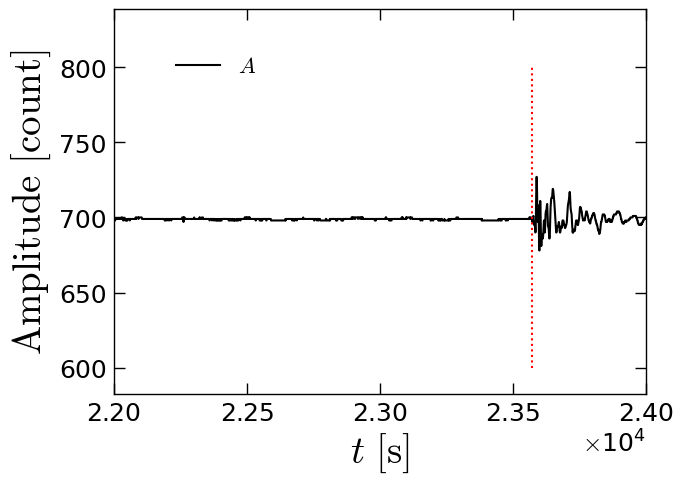

In [24]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(7, 5))
import matplotlib.cm as cm  # colormap
from matplotlib.patches import Circle

ax = fig.add_subplot(111)
# 横軸を10^にする
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(18)
ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
ax.get_xaxis().set_tick_params(pad=10)

##################################
npArraydata = np.loadtxt("/content/drive/MyDrive/2AP_07/day2/A.TXT", comments='!', unpack=True)
value_0   =  npArraydata[0,]-npArraydata[0,0]
value_1   =  npArraydata[1,]
ax.plot(value_0 , value_1,  label="$A$", color = "black")#color = cm.viridis(0./5.))
##################################

up1 =  pd.read_excel(f"/content/drive/MyDrive/2AP_07/day2/A.xlsx", usecols="B", skiprows=0).to_numpy().flatten()
plt.vlines(up1[3], 600, 800, color='red', linestyles='dotted')


#　軸から数字を離す方法
ax.get_xaxis().set_tick_params(pad=5)
ax.get_yaxis().set_tick_params(pad=5)
plt.rcParams["legend.frameon"] = False     # 凡例を囲うかどうか、Trueで囲う、Falseで囲わない

### ここを手で変える．
xl_range = 22000
xr_range = 24000
ax.set_xlim(xl_range, xr_range)
### ここを手で変える．

plt.tick_params(labelsize=24)
ax.set_xlabel('$t~\mathrm{[s]}$', fontsize=28)
ax.set_ylabel('$\mathrm{Amplitude}~\mathrm{[count]}$', fontsize=28)
plt.legend(bbox_to_anchor=(0.1, 0.9), loc='upper left', borderaxespad=0, fontsize=16, edgecolor='black', fancybox=False, ncol=1)
plt.tick_params(labelsize=18)
fig.savefig('/content/drive/MyDrive/2AP_07/day2/A4.png', bbox_inches='tight',transparent=True)
files.download("/content/drive/MyDrive/2AP_07/day2/A4.png")

plt.show()

# 弾性波の計算等

In [26]:
import numpy as np
import pandas as pd

# --- EVENTとStationのデータをRead
# pandasからnumpyの形式に変換その後一次元化
xEvent = pd.read_excel("/content/drive/MyDrive/2AP_07/day2/Event.xlsx", usecols="B", skiprows=0).to_numpy().flatten()
yEvent = pd.read_excel("/content/drive/MyDrive/2AP_07/day2/Event.xlsx", usecols="C", skiprows=0).to_numpy().flatten()
#print(xEvent, yEvent) ### デバッグで確認用

xStation = pd.read_excel("/content/drive/MyDrive/2AP_07/day2/Station.xlsx", usecols="B", skiprows=0).to_numpy().flatten()
yStation = pd.read_excel("/content/drive/MyDrive/2AP_07/day2/Station.xlsx", usecols="C", skiprows=0).to_numpy().flatten()
#print(xStation, yStation) ### デバッグで確認用

# --- A~DのデータをRead
tau = []
for station in ["A", "B", "C", "D"]:
    index = pd.read_excel(f"/content/drive/MyDrive/2AP_07/day2/{station}.xlsx", usecols="B", skiprows=0).to_numpy().flatten().astype(int) - 1
    Time = np.loadtxt(f"/content/drive/MyDrive/2AP_07/day2/{station}.TXT", usecols=0) * 1e-4
    #print(index)   ### デバッグで確認用
    #print(Time,Time[index])   ### デバッグで確認用
    tau.append(Time[index])
tau = np.array(tau).T
#print(tau) ### デバッグで確認用

# $R_ij$
R = np.sqrt((xEvent[:, None] - xStation[None, :])**2 + (yEvent[:, None] - yStation[None, :])**2)

# R_ は 教科書でいうところの$R^'$，tau_ は 教科書でいうところの$\tau^'$
R_ = R - R.mean(axis=1, keepdims=True) - R.mean(axis=0, keepdims=True) + R.mean()
tau_ = tau - tau.mean(axis=1, keepdims=True) - tau.mean(axis=0, keepdims=True) + tau.mean()

#print(R) ### デバッグで確認用
#print(R_) ### デバッグで確認用
#print(tau_) ### デバッグで確認用

# 波の速度 v の推定
v = np.mean(R * R_) / np.mean(R * tau_)
print(f"Estimated wave velocity v: {v:.4f}")

# イベント時刻の推定（イベントごと）
tEvent = tau.mean(axis=1) - R.mean(axis=1)/v
print(f"Event times tEvent:\n{tEvent}")

# stationごとの時刻補正
Tstation = tau.mean() - tau.mean(axis=0) - (R.mean() - R.mean(axis=0))/v
print(f"Station time offsets Tstation:\n{Tstation}")

Estimated wave velocity v: 979.0618
Event times tEvent:
[94.86856795 95.48533801 96.06425455 96.59003764]
Station time offsets Tstation:
[ 0.01715508 -0.00893309  0.0115226  -0.0197446 ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

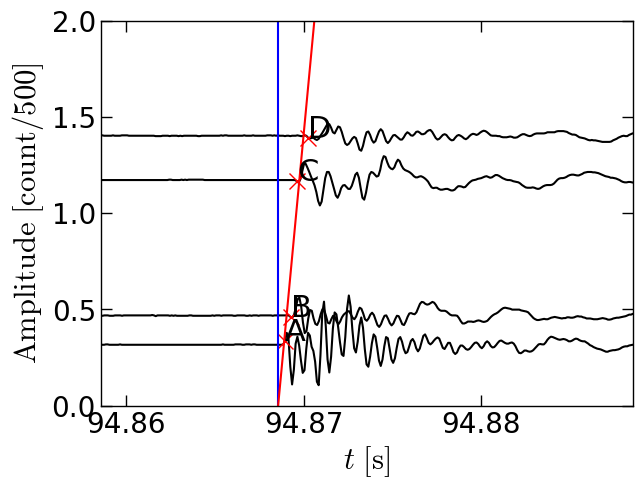

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

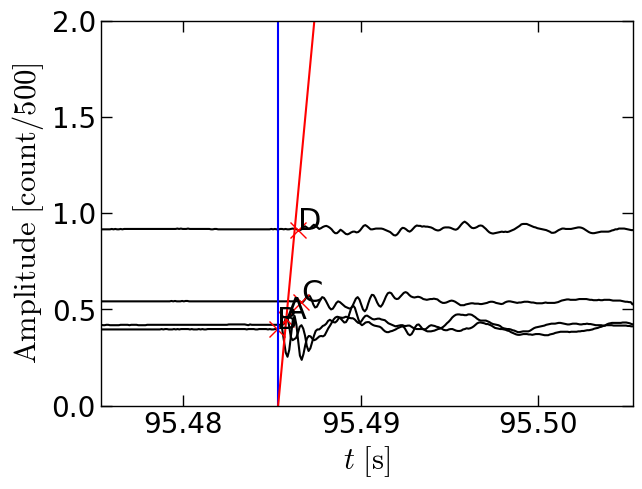

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

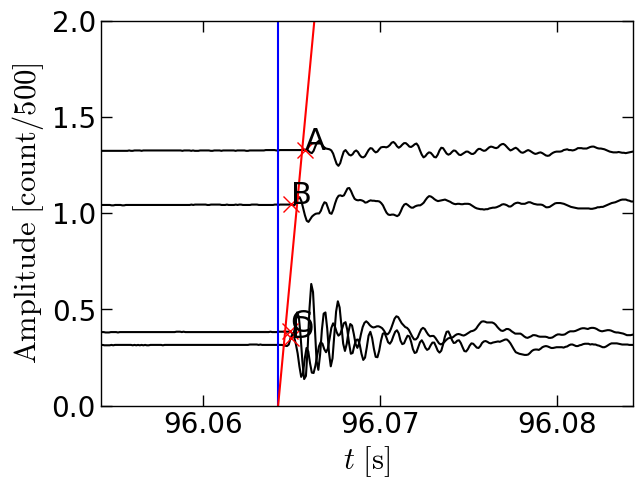

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

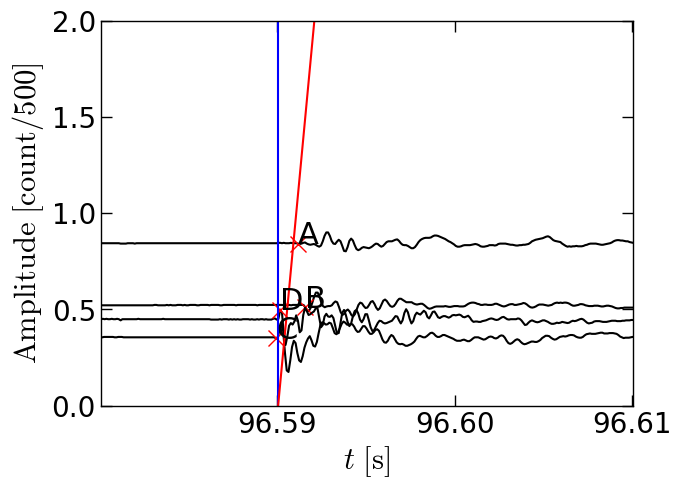

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stations = ["A", "B", "C", "D"]

# データ読み込み
index_list, Time_list, Data_list = [], [], []

for station in stations:
    idx = pd.read_excel(f"/content/drive/MyDrive/2AP_07/day2/{station}.xlsx", usecols=[1], skiprows=0).to_numpy().flatten().astype(int)
    time = np.loadtxt(f"/content/drive/MyDrive/2AP_07/day2/{station}.TXT", usecols=[0]) * 1e-4
    data = np.loadtxt(f"/content/drive/MyDrive/2AP_07/day2/{station}.TXT", usecols=[1])
    index_list.append(idx)
    Time_list.append(time)
    Data_list.append(data)

index = np.column_stack(index_list)  # shape: (イベント数, 観測点数)
Time = np.column_stack(Time_list)    # shape: (時系列長, 観測点数)
Data = np.column_stack(Data_list)    # shape: (時系列長, 観測点数)


# 図の描画ループ
for iEvent in range(index.shape[0]):
    #print(iEvent) ### デバッグで確認用
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111)
    for jStation in range(index.shape[1]):
        #print(jStation) ### デバッグで確認用
        index0 = index[iEvent, jStation]
        xData = Time[:, jStation] + Tstation[jStation]
        yData = Data[:, jStation]
        trace = (yData - yData[index0]) / 500 + R[iEvent, jStation]
        ax.plot(xData, trace, 'k')
        ax.plot(xData[index0], R[iEvent, jStation], 'xr', ms = 12)
        ax.text(xData[index0], R[iEvent, jStation], stations[jStation], fontsize=22)

    ax.axvline(tEvent[iEvent], color='b')
    ax.set_xlim(tEvent[iEvent] - 0.01, tEvent[iEvent] + 0.02)
    ax.set_ylim(0, 2)
    ax.plot([tEvent[iEvent], tEvent[iEvent] + 2 / v], [0, 2], 'r')
    plt.tick_params(labelsize=20)
    ax.set_xlabel('$t~\mathrm{[s]}$', fontsize=22)
    ax.set_ylabel('$\mathrm{Amplitude}~\mathrm{[count/500]}$', fontsize=22)
    fig.savefig('/content/drive/MyDrive/2AP_07/day2/plot_{}.png'.format(iEvent), bbox_inches='tight',transparent=True)
    files.download("/content/drive/MyDrive/2AP_07/day2/plot_{}.png".format(iEvent))
    plt.show()
    plt.close()

